# 3章 ニューラルネットワーク

パーセプトロンの重みパラメータを自動で決定するのがニューラルネットワーク

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [4]:
y.astype(np.int)

array([0, 1, 1])

## 3.2 活性化関数

入力が0を超えたら出力を1とするステップ関数。活性化関数としてステップ関数を用いているのがパーセプトロン、それ以外の活性化関数を適用することでニューラルネットワークになる。

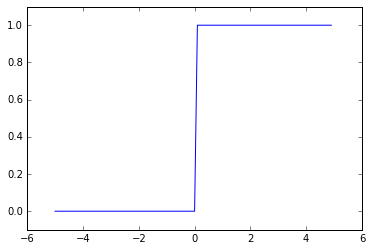

In [5]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y軸の範囲を指定
plt.show()

その他の活性化関数としてシグモイド関数

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

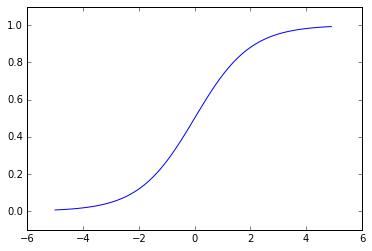

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y軸の範囲を指定
plt.show()

ニューラルネットワークでは活性化関数に線形関数を適用することは意味がない。線形関数を適用すると隠れ層のないニューラルネットワークでも同じことを表現することができる。

最近ではReLU (Rectified Linear Unit)という関数が主に用いられる。

In [9]:
def relu(x):
    return np.maximum(0, x)

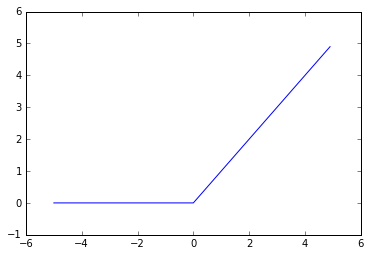

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 6)  # y軸の範囲を指定
plt.show()

## 3.3 多次元配列の計算

In [11]:
A = np.array([1, 2, 3, 4])
A

array([1, 2, 3, 4])

In [12]:
np.ndim(A)  # 配列の次元数

1

In [13]:
A.shape  # 配列の形状

(4,)

In [14]:
A.shape[0]  # タプルなので要素を取得できる

4

In [15]:
B = np.array([[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [16]:
np.ndim(B)

2

In [17]:
B.shape

(3, 2)

## 3.3.2 行列の内積

In [18]:
A = np.array([[1,2,3], [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
A.shape

(2, 3)

In [20]:
B = np.array([[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [21]:
B.shape

(3, 2)

In [22]:
np.dot(A, B)  # 行列の内積

array([[22, 28],
       [49, 64]])

2次元配列と1次元配列の積

In [23]:
A = np.array([[1,2], [3, 4], [5,6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [24]:
A.shape

(3, 2)

In [25]:
B = np.array([7,8])
B

array([7, 8])

In [26]:
B.shape

(2,)

In [27]:
np.dot(A, B)

array([23, 53, 83])

## 3.3.3 ニューラルネットワークの内積

In [28]:
X = np.array([1, 2])
X.shape

(2,)

In [29]:
W = np.array([[1, 3, 5], [2, 4, 6]])
W

array([[1, 3, 5],
       [2, 4, 6]])

In [30]:
W.shape

(2, 3)

In [31]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

## 3.4 3層ニューラルネットワークの実装

<img  src="images/W26TW9W6BAU93IUOS66EWSKYMV9AN5UR.png"/>

$h()$は活性化関数でここではシグモイド関数を用いる。

In [32]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [33]:
X.shape

(2,)

In [34]:
W1.shape

(2, 3)

In [35]:
B1.shape

(3,)

In [36]:
A1 = np.dot(X, W1) + B1
A1

array([ 0.3,  0.7,  1.1])

In [37]:
Z1 = sigmoid(A1)
Z1

array([ 0.57444252,  0.66818777,  0.75026011])

In [38]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [39]:
Z1.shape

(3,)

In [40]:
W2.shape

(3, 2)

In [41]:
B2.shape

(2,)

In [42]:
A2 = np.dot(Z1, W2) + B2
A2

array([ 0.51615984,  1.21402696])

In [43]:
Z2 = sigmoid(A2)
Z2

array([ 0.62624937,  0.7710107 ])

<img  src="images/URX56BSU14YLM3QMLG1OX23KSF9QEJB1.png"/>

In [44]:
def identity_function(x):
    return x

In [45]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3

In [46]:
Y = identity_function(A3)
Y

array([ 0.31682708,  0.69627909])

`identity_function`は恒等関数と呼ぶ。入力をそのまま出力する。

出力層の活性化関数は$\sigma()$で表して、隠れ層の活性化関数$h()$とは異なる。出力層の活性化関数は解く問題によって決める。回帰問題では恒等関数、2クラス分類問題ではシグモイド関数、多クラス分類問題ではソフトマックス関数を用いるのが一般的。

## 3.4.3 実装のまとめ

In [47]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([ 0.31682708,  0.69627909])

## 3.5 出力層の設計

出力層の活性化関数は、回帰問題では恒等関数、多クラス分類問題ではソフトマックス関数を用いる。

ソフトマックス関数は以下の通り。出力層のノード数が$n$個あって、$k$個目の出力$y_k$を求める。

$$
y_k = \frac{\exp(a_k)}{\displaystyle \sum_{i=1}^n \exp(a_i)}
$$

In [48]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [49]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([ 0.01821127,  0.24519181,  0.73659691])

## 3.5.2 ソフトマックス関数の実装上の注意

ソフトマックス関数には指数関数の計算(`exp`)が含まれているため、計算結果が大きくなりすぎやすく、正確な値を得られなくなってしまう。そのため、計算結果が変わらないように定数倍して調整する。以下の式から、ソフトマックス関数の引数にある定数を足したり引いたりしても結果が変わらないことがわかる。

$$
\begin{eqnarray*}
  y_k = \frac{\exp(a_k)}{\displaystyle \sum_{i=1}^n \exp(a_i)}
     &=& \frac{C \exp(a_k)}{\displaystyle C \sum_{i=1}^n \exp(a_i)} \\
     &=& \frac{\exp(a_k + \log C)}{\displaystyle \sum_{i=1}^n \exp(a_i + \log C)} \\
     &=& \frac{\exp(a_k + C')}{\displaystyle \sum_{i=1}^n \exp(a_i + C')}
\end{eqnarray*}
$$

In [50]:
a = np.array([1010, 1000, 990])
softmax(a)  # 正しく計算できない

/Users/speg03/.anyenv/envs/pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/speg03/.anyenv/envs/pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


array([ nan,  nan,  nan])

In [51]:
c = np.max(a)  # 正しく計算できるようにするための定数（要素の最大値を取るのが一般的）
softmax(a - c)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [52]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [53]:
softmax(a)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

## 3.5.3 ソフトマックス関数の特徴

In [54]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [55]:
np.sum(y)

1.0

ソフトマックス関数の計算結果をすべて足し合わせると1になる。そのため、各要素の値を確率として解釈することができる。

## 3.5.4 出力層のニューロンの数

出力層のニューロンの数は解く問題に応じて変更する。多クラス分類問題の場合は、出力層のニューロンの数を分類したいクラスの数に設定するのが一般的。

## 3.6 手書き数字認識

## 3.6.1 MNISTデータセット

In [57]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

初回はダウンロードに時間がかかる。

In [58]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [59]:
x_train.shape

(60000, 784)

In [60]:
t_train.shape

(60000,)

In [61]:
x_test.shape

(10000, 784)

In [62]:
t_test.shape

(10000,)

In [63]:
img = x_train[0]
img.shape

(784,)

In [64]:
img = img.reshape(28,28)
img.shape

(28, 28)

In [65]:
label = t_train[0]
label

5

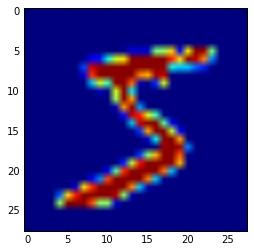

In [66]:
plt.imshow(img)
plt.show()

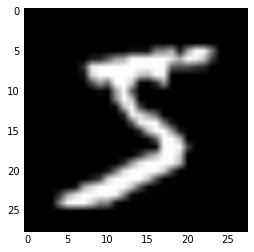

In [67]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

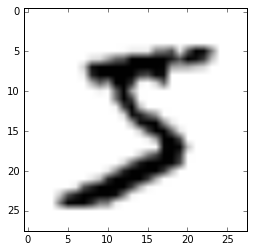

In [68]:
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

## 3.6.2 ニューラルネットワークの推論処理

In [69]:
import pickle

In [72]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

* ニューロンの数
  * 入力層: 784
  * 隠れ層1 (W1,b1): 50
  * 隠れ層2 (W2,b2): 100
  * 出力層 (W3,b3): 10

In [73]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 最も確率の高い要素のインデックスを取得

    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


`load_mnist`の引数で`normalize=True`とした場合、画像の各ピクセルの値を255で除算して、データの値が0.0〜1.0に収まるように変換される。このような処理を正規化(normalization)という。入力データに対して、何らかの処理を行っておくことを前処理といって、正規化も前処理の1つ。

## 3.6.3 バッチ処理

In [74]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [75]:
x.shape

(10000, 784)

In [76]:
x[0].shape

(784,)

In [77]:
W1.shape

(784, 50)

In [78]:
W2.shape

(50, 100)

In [79]:
W3.shape

(100, 10)

In [80]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
